In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
#DATASET
df_path= 'Dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

In [3]:
df = pd.read_csv(df_path)

## 1. Exploratory data analysis:
1. Descriptive analysis
2. Data visualization
3. Correlation test (Pearson correlation)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [5]:
df.describe()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
# Check apakah ada NULL values
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


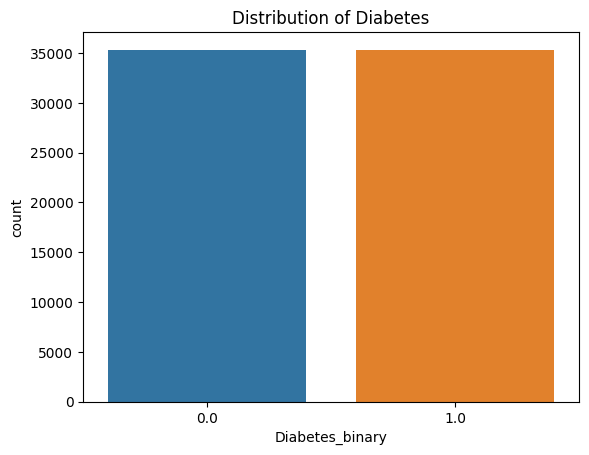

In [8]:
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Distribution of Diabetes')
plt.show()

## 2. Split data untuk training dan testing (80:20).
Index dari data training dan test harus sama ketika digunakan untuk training/testing pada semua algoritma klasifikasi.


In [10]:
# codeblock for split data


X = df.iloc[:,1:]
y = df['Diabetes_binary']

# Bagi dataset menjadi data latih (training) dan data uji (testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
61789,1.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,4.0,0.0,3.0,0.0,1.0,11.0,4.0,6.0
46280,1.0,1.0,1.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,11.0,4.0,2.0
18465,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,4.0,10.0,27.0,1.0,0.0,8.0,5.0,5.0
45540,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,6.0,7.0
28119,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,2.0,1.0,0.0,5.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,1.0,0.0,1.0,28.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,4.0,5.0
6265,1.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
54886,1.0,1.0,1.0,23.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,0.0,11.0,6.0,4.0
860,1.0,0.0,1.0,28.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,4.0,6.0


In [12]:
y_train

61789    1.0
46280    1.0
18465    0.0
45540    1.0
28119    0.0
        ... 
37194    1.0
6265     0.0
54886    1.0
860      0.0
15795    0.0
Name: Diabetes_binary, Length: 56553, dtype: float64

## 3. Metode klasifikasi:
1. Multinomial Naive Bayes
2. SVM
3. Random Forest
4. Stochastic Gradient Descent
5. Logisticc Regression (isi dulu aja hha)

In [13]:
#codeblock for classification

# Inisialisasi model SVM
svm_model = SVC(kernel='linear')
# svm_model = LinearSVC(multi_class='crammer_singer', dual=False, max_iter=1000)



In [76]:
# Latih model pada data latih
svm_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = svm_model.predict(X_test)

with open('pickle/svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

## 4. Model evaluator:
1. Precision
2. Recall
3. F1-measure

In [ ]:
#codeblock for evaluator
# Hitung precision, recall, dan F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Tampilkan hasil evaluasi
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7504859627944225
Recall: 0.7484263384963576
F1-score: 0.7479570217656902


## 5. Pre-processing:
1. Feature selection (fs)
2. Dimensionality reduction (dr)
3. Normalisasi (norm)


In [13]:
X_train_normalized = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_test_normalized = (X_test - X_test.min()) / (X_test.max() - X_test.min())

In [22]:
# Latih model pada data latih
svm_model.fit(X_train_normalized, y_train)

# Lakukan prediksi pada data uji
y_pred = svm_model.predict(X_test_normalized)

In [16]:
y_pred = loaded_model.predict(X_test_normalized)

In [17]:
#codeblock for evaluator
# Hitung precision, recall, dan F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Tampilkan hasil evaluasi
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7477358924331233
Recall: 0.746658179503501
F1-score: 0.746418154355341


In [24]:
with open('pickle/svm_model_normalized.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

In [14]:
with open('pickle/svm_model_normalized.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [15]:
from sklearn.metrics import classification_report,confusion_matrix
pred_svm= loaded_model.predict(X_test_normalized)
print(confusion_matrix(y_test,pred_svm))
print(classification_report(y_test,pred_svm))

[[5071 2019]
 [1563 5486]]
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      7090
         1.0       0.73      0.78      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=500)
rfc.fit(X_train_normalized,y_train)

RandomForestClassifier(n_estimators=500)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
pred_rfc= rfc.predict(X_test)
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

[[ 283 6807]
 [  47 7002]]
              precision    recall  f1-score   support

         0.0       0.86      0.04      0.08      7090
         1.0       0.51      0.99      0.67      7049

    accuracy                           0.52     14139
   macro avg       0.68      0.52      0.37     14139
weighted avg       0.68      0.52      0.37     14139



In [16]:
important_features = rfc.feature_importances_
print(important_features)

[0.07525525 0.03976949 0.00586274 0.16876277 0.028514   0.00986243
 0.01967206 0.02333337 0.02809884 0.0219347  0.00964213 0.0076004
 0.0119888  0.10810039 0.05182291 0.06865689 0.02770248 0.0265338
 0.12590057 0.05778372 0.08320224]


In [17]:
# feature selection

from scipy.stats import pearsonr, kendalltau

# Mengukur korelasi antara setiap fitur dengan target (output)
correlation_with_target = df.corr()['Diabetes_binary'][1:]  # Mengabaikan korelasi dengan dirinya sendiri

threshold = 0.1  # Misalnya, ambang batas korelasi
selected_features = correlation_with_target[correlation_with_target.abs() > threshold]

print("Korelasi dengan Target (Pearson):")
print(selected_features)


Korelasi dengan Target (Pearson):
HighBP                  0.381516
HighChol                0.289213
CholCheck               0.115382
BMI                     0.293373
Stroke                  0.125427
HeartDiseaseorAttack    0.211523
PhysActivity           -0.158666
GenHlth                 0.407612
PhysHlth                0.213081
DiffWalk                0.272646
Age                     0.278738
Education              -0.170481
Income                 -0.224449
Name: Diabetes_binary, dtype: float64


In [19]:
# Dimentional Reduction
from sklearn.decomposition import PCA

# Inisialisasi model PCA dengan jumlah komponen utama yang diinginkan
pca = PCA(n_components=5)

# Fit dan transformasi data ke ruang fitur baru
X_pca = pca.fit_transform(X)
print(X_pca)
# X_pca sekarang berisi data yang telah direduksi menjadi 2 komponen utama


[[ 20.16457879   3.11330066 -12.77986327   6.62233829  -2.27105485]
 [ -7.57906967  -1.25115448  -2.38829455  -2.92375662  -2.61327433]
 [  0.72574323   1.49568061  -6.95212834  -2.90311798  -3.59164686]
 ...
 [  0.05248758 -12.47170331   4.22524766  -5.74301431   0.38123328]
 [ -8.63486874  -6.34928859  -8.18180812  -3.14024183   2.74840562]
 [ -7.46890757  -2.02880141  -2.84576375  -1.29502369   3.61216412]]
